<a href="https://colab.research.google.com/github/chsanabriam/Esatdistica_Aplicada/blob/master/serie_tiempo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import pandas_datareader as dr
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


#Conceptos básicos de series de tiempo
Una **serie de tiempo** es el conjunto de valores de una variable ($y$) ordenados en el tiempo. Cada uno de dichos valores se designa genéricamente como $y_t$, donde el subíndice $t$ representa el período al que se refiere, que puede ser un año, trimestre, mes, semana, día o cualquier otra unidad temporal.

Para analizar su evolución, generalmente se comienza por representar gráficamente la serie, situando sus valores en ordenadas y en abscisas los períodos temporales a los que corresponden. En cada caso, debe elegirse la escala adecuada
para que el gráfico refleje la evolución de la serie sin distorsionarla y para que puedan observarse sus principales movimientos: las oscilaciones a corto, medio y largo plazo,
la existencia de valores anómalos, etcétera.

Son innumerables las aplicaciones que se pueden citar, en distintas áreas del conocimiento, tales como, en economía, física, geofísica, química, en demografía, en marketing, en telecomunicaciones, en transporte, etc.

Series de tiempo | Ejemplos
:----------------|:--------
Series económicas| Precios de un articulo
Series físicas   | Meteorología
Geofísica        | Series sismológicas
Series demográficas | Tasas de crecimiento de una población


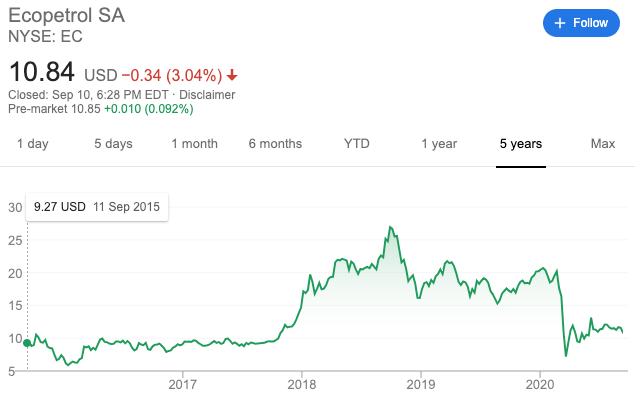
Fuente: Google

El análisis clásico de las series de tiempo parte de la idea de que cada valor de la variable es el resultado de la combinación de cuatro factores no observables que determinan su evolución.

Dichos factores son el movimiento a largo plazo o **tendencia**, que refleja la marcha general del fenómeno analizado; los movimientos a medio plazo o **variaciones
cíclicas**, que generalmente están relacionados con los ciclos económicos de prosperidad y recesión; las variaciones a corto plazo (trimestrales, mensuales, semanales,
diarias o de otra periodicidad) o **variaciones estacionales**, ocasionadas por causas periódicas, y finalmente los movimientos esporádicos o **variaciones accidentales o residuales** derivados de acontecimientos ocasionales.

**Nota:** las series temporales no siempre contienen los cuatro elementos sino que
pueden estar formadas sólo por alguno o algunos de ellos.

Un modelo clásico para una serie de tiempo, supone que una serie $y(t)$ puede ser expresada como la suma o producto de tres componentes: *tendencia*, *estacionalidad* y un término de *error aleatorio*.

Existen tres modelos de series de tiempo, que generalmente se aceptan como buenas aproximaciones a las verdaderas relaciones, entre los componentes de los datos observados.  Estos son:

* Aditivo: $y(t) = T(t) + E(t) + A(t)$
* Multiplicativo: $y(t) = T(t) \cdot E(t) \cdot A(t)$
* Mixto: $y(t) = T(t) \cdot E(t) + A(t)$

Donde:
* $y(t)$ serie observada
* $T(t)$ componente de tendencia
* $E(t)$ componente estacional
* $A(t)$ componente aleatoria (residual) el cual es muy común asumir que es un ruido blanco con media cero y varianza constante.

Un modelo aditivo, es adecuado, por ejemplo, cuando $E(t)$ no depende de otras componentes, como $T(t)$, sí por el contrario la estacionalidad varía con la tendencia, el modelo más adecuado es un modelo multiplicativo . Es claro que el modelo multiplicativo puede ser transformado en aditivo, tomando logaritmos.




##Análisis de la tendencia mediante el método de las medias móviles
Uno de los métodos más utilizados para aislar la tendencia es el de las medias móviles, que consiste en suavizar las fluctuaciones de la serie sustituyendo cada observación por el promedio de dicha observación y las más cercanas.

Para calcular la media móvil de las $n$ observaciones más cercanas en una serie de datos $y(t) = y_1, y_2, y_3, \ldots, y_t, \ldots, y_k$, usaremos la siguiente ecuación:

$$\bar{y_t} = \frac{\sum_{i=t-n}^{t}y_i}{n},\qquad y_{t-n} \geq y_1$$

Nº Observación | $y_t$ | $\bar{y_t}$
:--------------|:-----:|:----------:
1|$y_1$|
2|$y_2$|
$\vdots$|$\vdots$|
$n$|$y_n$|$\frac{y_1 + y_2 + \cdots  y_n}{n}$
$n+1$|$y_{n+1}$|$\frac{y_2 + y_3 + \cdots  y_{n+1}}{n}$
$\vdots$|$\vdots$|$\vdots$
$k$|$y_k$|$\frac{y_{k-n} + y_{k-n+1} + \cdots  y_k}{n}$


En este caso las primeras $n-1$ observaciones se pierden, debido a que no es posible hacer el cálculo de la media móvil para ellos.

##Análisis de la tendencia mediante el método de suavizamiento exponencial
El suavizamiento exponencial emplea un promedio ponderado de la serie de tiempo pasada como pronóstico.
En la práctica comenzamos haciendo que $F_1$, el primer valor de la serie de valores
uniformados, sea igual a $y_1$, que es el primer valor real de la serie. El modelo básico de
suavizamiento exponencial es el siguiente:

$$F_{t+1} = \alpha y_t + (1-\alpha)F_t$$

Donde:
* $F_{t+1}$ pronóstico de la serie de tiempo para el período $t+1$
* $y_t$ valor real de la serie de tiempo en el período t
* $F_t$ pronóstico de la serie de tiempo para el período $t$
* $\alpha$ constante de suavizamiento, $0 \leq \alpha \leq 1$

###Ejemplo medias móviles
Extraer la tendencia de la serie de ingresos (miles de euros) correspondientes a establecimientos turísticos en el periodo comprendido entre 1990 y 2003.

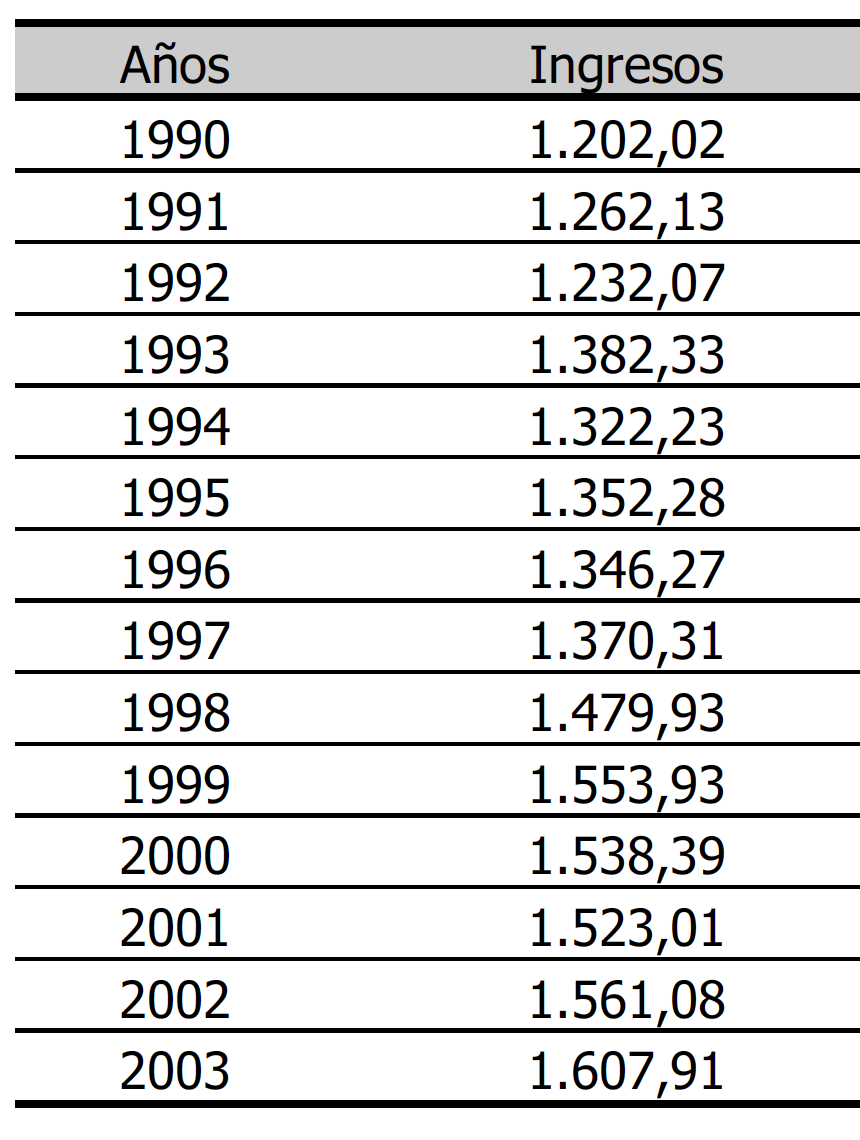

In [5]:
t = np.array(range(1990,2004))
ingresos = np.array([1202.02, 1262.13, 1232.07, 1382.33, 1322.23, 1352.28, 1346.27, 1370.31, 1479.93, 1553.93, 1538.39, 1523.01, 1561.08, 1607.91])

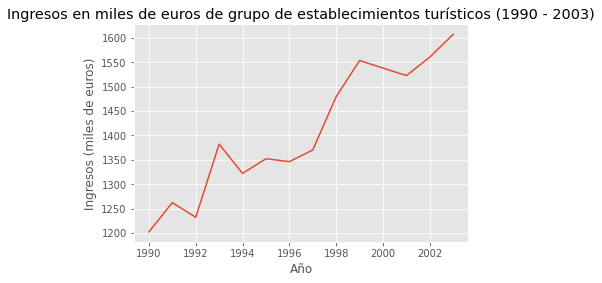

In [6]:
plt.plot(t,ingresos)
plt.title('Ingresos en miles de euros de grupo de establecimientos turísticos (1990 - 2003)')
plt.xlabel('Año')
plt.ylabel('Ingresos (miles de euros)')
plt.show()

In [7]:
# Hacer media móvil para n = 3
n = 3
k = len(ingresos)
mmovil = np.empty(k)
mmovil[:] = np.nan
ini = 0
for i in range(n-1,k):
  mmovil[i] = np.sum(ingresos[ini:i+1])/n
  ini += 1
mmovil

array([          nan,           nan, 1232.07333333, 1292.17666667,
       1312.21      , 1352.28      , 1340.26      , 1356.28666667,
       1398.83666667, 1468.05666667, 1524.08333333, 1538.44333333,
       1540.82666667, 1564.        ])

Haga el mismo proceso en su calculadora y verifique si los resultados son iguales.

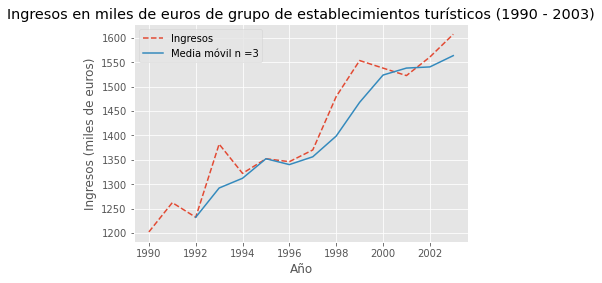

In [8]:
plt.plot(t,ingresos, '--', label='Ingresos')
plt.plot(t,mmovil, label='Media móvil n =3')
plt.title('Ingresos en miles de euros de grupo de establecimientos turísticos (1990 - 2003)')
plt.xlabel('Año')
plt.ylabel('Ingresos (miles de euros)')
plt.legend()
plt.show()

###Ejercicio medias móviles 1
Cree una función que reciba como argumentos la serie temporal de ingresos y el número $n$. A partir de esta función calcule la media móvil para $n = 4$ y haga un gráfico comparativo entre el valor de los ingresos, la media móvil $n=3$ y la media móvil $n=4$.

In [9]:
# Escriba su código aquí

La libreria de pandas tiene una función que hace el cálculo de la media móvil.
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html

In [10]:
df_ingresos = pd.DataFrame({'year':t,'ingresos':ingresos})
df_ingresos.set_index('year')
df_ingresos.head()

,year,ingresos
0,1990,1202.02
1,1991,1262.13
2,1992,1232.07
3,1993,1382.33
4,1994,1322.23


In [11]:
df_ingresos['mmovil'] = df_ingresos['ingresos'].rolling(3).mean()
df_ingresos.head()

,year,ingresos,mmovil
0,1990,1202.02,NaN
1,1991,1262.13,NaN
2,1992,1232.07,1232.073333
3,1993,1382.33,1292.176667
4,1994,1322.23,1312.210000


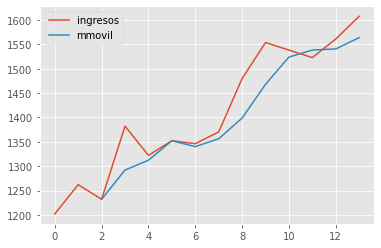

In [12]:
df_ingresos[['ingresos','mmovil']].plot();

##Estacionalidad de la serie de tiempo
La estimación de la estacionalidad no sólo se realiza con el fin de incorporarla al modelo para obtener predicciones, sino también con el fin de eliminarla de la serie para visualizar otras componentes como tendencia y componente irregular que se pueden confundir en las fluctuaciones estacionales.

De acuerdo con los modelos expuestos anteriormente la estacionalidad se puede representar:
* $y(t) - T(t) = E(t) + A(t)$
* $\frac{y(t)}{T(t)} = E(t) + \frac{A(t)}{T(t)}$

Si denotamos el periodo de la serie por $s$ entonces la componente estacional debe cumplir:
$$ E(t+s) = E(t)$$
Por tanto, para conocer
la componente estacional $E(t)$ es suficiente conocer $s$ de sus valores consecutivos (en el tiempo).

###Ejemplo estacionalidad 1
Encontrar la estacionalidad en los datos de los ingresos.

In [14]:
est = ingresos - mmovil
est

array([            nan,             nan, -3.33333333e-03,  9.01533333e+01,
        1.00200000e+01,  0.00000000e+00,  6.01000000e+00,  1.40233333e+01,
        8.10933333e+01,  8.58733333e+01,  1.43066667e+01, -1.54333333e+01,
        2.02533333e+01,  4.39100000e+01])

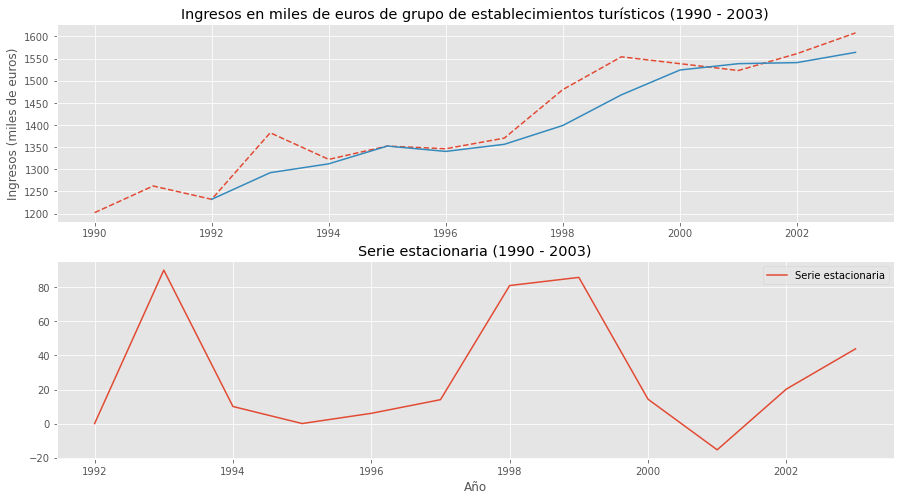

In [19]:
plt.figure(figsize=(15,8))
plt.subplot(211)
plt.plot(t,ingresos, '--', label='Ingresos')
plt.plot(t,mmovil, label='Media móvil n =3')
plt.title('Ingresos en miles de euros de grupo de establecimientos turísticos (1990 - 2003)')
plt.ylabel('Ingresos (miles de euros)')
plt.subplot(212)
plt.plot(t,est, '-',label='Serie estacionaria')
plt.title('Serie estacionaria (1990 - 2003)')
plt.xlabel('Año')
plt.legend()
plt.show()

###Ejercicio estacionalidad

In [31]:
!pip install pydataset
from pydataset import data

     |████████████████████████████████| 15.9MB 299kB/s 
  Created wheel for pydataset: filename=pydataset-0.2.0-cp36-none-any.whl size=15939431 sha256=a7b63814d4e8c934bb5dcd3638b750fe78caa643b20da79d789fcbaa1dd33f95
  Stored in directory: /root/.cache/pip/wheels/fe/3f/dc/5d02ccc767317191b12d042dd920fcf3432fab74bc7978598b
Successfully built pydataset
initiated datasets repo at: /root/.pydataset/


In [40]:
co2 = data('co2')
co2.head()

,time,co2
1,1959.000000,315.42
2,1959.083333,316.31
3,1959.166667,316.50
4,1959.250000,317.56
5,1959.333333,318.13


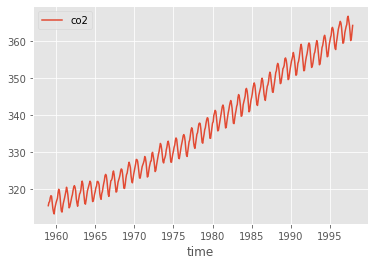

In [41]:
co2.plot(x='time')

Calcule la estacionalidad con $n = 30$.

In [ ]:
# Escriba su código aquí

Usando la libreria statsmodels para hacer la descomposición.

https://www.statsmodels.org/stable/index.html

In [44]:
import statsmodels.api as sm
descomposicion = sm.tsa.seasonal_decompose(co2['co2'],model='additive', freq=30)  

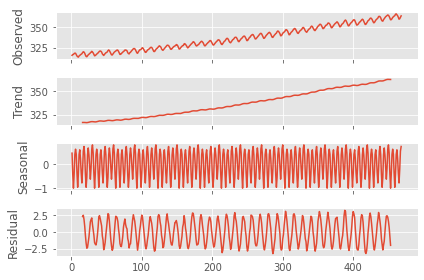

In [46]:
descomposicion.plot();

##Ejercicio general
Análisis del precio de Ecopetrol en la bolsa de Nueva York. El ejercicio se realizará con los datos del precio del cierre del mercado. Encontrar la tendencia a partir de la media móvil y del suavizamiento exponencial.

Encontrar la estacionalidad de la serie por meses. ¿En qué meses debo comprar y en qué meses debo vender?.

In [1]:
! pip install pandas_datareader

In [13]:
from datetime import date
Activo = 'EC'
FechaInicio = '01-01-2000'
FechaFinal = date.today()
df = dr.data.get_data_yahoo(Activo, start=FechaInicio, end=FechaFinal)
df = df[~df.index.duplicated()]
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2008-09-18,26.299999,22.400000,23.00,24.750000,371500.0,13.572227
2008-09-19,27.350000,24.750000,27.35,27.250000,124100.0,14.943156
2008-09-22,27.850000,25.350000,27.50,26.950001,140200.0,14.778646
2008-09-23,26.490000,24.500000,26.25,24.950001,122500.0,13.681904
2008-09-24,25.250000,23.700001,25.25,24.450001,48300.0,13.407715
